In [27]:
import pandas as pd


In [28]:
df = pd.read_csv('Restaurant_Inspection_Results.csv')

/Users/aliyaute/.pyenv/versions/3.7.3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [30]:
result = df[df.ZIPCODE==10025.0]

In [5]:
result.ZIPCODE = result.ZIPCODE.astype(int)

/Users/aliyaute/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [31]:
result.to_csv('restaurants.csv', index=False)

In [32]:
df = pd.read_csv('restaurants.csv')
df.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40362264,P & S DELI GROCERY,MANHATTAN,730,COLUMBUS AVENUE,10025.0,2129323030,American,5/13/19,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,9.0,A,5/13/19,7/14/19,Cycle Inspection / Initial Inspection
1,40362264,P & S DELI GROCERY,MANHATTAN,730,COLUMBUS AVENUE,10025.0,2129323030,American,5/13/19,Violations were cited in the following area(s).,09C,Food contact surface not properly maintained.,Not Critical,9.0,A,5/13/19,7/14/19,Cycle Inspection / Initial Inspection
2,40362264,P & S DELI GROCERY,MANHATTAN,730,COLUMBUS AVENUE,10025.0,2129323030,American,5/13/19,Violations were cited in the following area(s).,22G,NaN,Not Applicable,9.0,A,5/13/19,7/14/19,Cycle Inspection / Initial Inspection


In [33]:
df.dropna(inplace=True)
df.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40362264,P & S DELI GROCERY,MANHATTAN,730,COLUMBUS AVENUE,10025.0,2129323030,American,5/13/19,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,9.0,A,5/13/19,7/14/19,Cycle Inspection / Initial Inspection
1,40362264,P & S DELI GROCERY,MANHATTAN,730,COLUMBUS AVENUE,10025.0,2129323030,American,5/13/19,Violations were cited in the following area(s).,09C,Food contact surface not properly maintained.,Not Critical,9.0,A,5/13/19,7/14/19,Cycle Inspection / Initial Inspection
3,40362264,P & S DELI GROCERY,MANHATTAN,730,COLUMBUS AVENUE,10025.0,2129323030,American,12/18/18,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,12.0,A,12/18/18,7/14/19,Cycle Inspection / Re-inspection


In [34]:
df = df.drop(columns=['CAMIS','BORO','PHONE','VIOLATION CODE', 'GRADE DATE','RECORD DATE'])
df.head(3)

,DBA,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,INSPECTION TYPE
0,P & S DELI GROCERY,730,COLUMBUS AVENUE,10025.0,American,5/13/19,Violations were cited in the following area(s).,"Raw, cooked or prepared food is adulterated, c...",Critical,9.0,A,Cycle Inspection / Initial Inspection
1,P & S DELI GROCERY,730,COLUMBUS AVENUE,10025.0,American,5/13/19,Violations were cited in the following area(s).,Food contact surface not properly maintained.,Not Critical,9.0,A,Cycle Inspection / Initial Inspection
3,P & S DELI GROCERY,730,COLUMBUS AVENUE,10025.0,American,12/18/18,Violations were cited in the following area(s).,Cold food item held above 41Âº F (smoked fish ...,Critical,12.0,A,Cycle Inspection / Re-inspection


In [35]:
import re

In [36]:

df = df.reset_index().drop(columns="index")
df.head(3)

,DBA,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,INSPECTION TYPE
0,P & S DELI GROCERY,730,COLUMBUS AVENUE,10025.0,American,5/13/19,Violations were cited in the following area(s).,"Raw, cooked or prepared food is adulterated, c...",Critical,9.0,A,Cycle Inspection / Initial Inspection
1,P & S DELI GROCERY,730,COLUMBUS AVENUE,10025.0,American,5/13/19,Violations were cited in the following area(s).,Food contact surface not properly maintained.,Not Critical,9.0,A,Cycle Inspection / Initial Inspection
2,P & S DELI GROCERY,730,COLUMBUS AVENUE,10025.0,American,12/18/18,Violations were cited in the following area(s).,Cold food item held above 41Âº F (smoked fish ...,Critical,12.0,A,Cycle Inspection / Re-inspection


In [37]:
df = df.drop(columns=['SCORE'])
df.head(3)

,DBA,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,CRITICAL FLAG,GRADE,INSPECTION TYPE
0,P & S DELI GROCERY,730,COLUMBUS AVENUE,10025.0,American,5/13/19,Violations were cited in the following area(s).,"Raw, cooked or prepared food is adulterated, c...",Critical,A,Cycle Inspection / Initial Inspection
1,P & S DELI GROCERY,730,COLUMBUS AVENUE,10025.0,American,5/13/19,Violations were cited in the following area(s).,Food contact surface not properly maintained.,Not Critical,A,Cycle Inspection / Initial Inspection
2,P & S DELI GROCERY,730,COLUMBUS AVENUE,10025.0,American,12/18/18,Violations were cited in the following area(s).,Cold food item held above 41Âº F (smoked fish ...,Critical,A,Cycle Inspection / Re-inspection


In [13]:
df.sort_values(by='GRADE', ascending=True).head()

,DBA,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,CRITICAL FLAG,GRADE,INSPECTION TYPE
0,P & S DELI GROCERY,730,COLUMBUS AVENUE,10025,American,5/13/19,Violations were cited in the following area(s).,"Raw, cooked or prepared food is adulterated, c...",Critical,A,Cycle Inspection / Initial Inspection
1021,PLOWSHARES COFFEE,2730,BROADWAY,10025,CafÃ©/Coffee/Tea,3/27/19,Violations were cited in the following area(s).,"Food contact surface not properly washed, rins...",Critical,A,Cycle Inspection / Initial Inspection
1020,PLOWSHARES COFFEE,2730,BROADWAY,10025,CafÃ©/Coffee/Tea,3/27/19,Violations were cited in the following area(s).,Personal cleanliness inadequate. Outer garment...,Critical,A,Cycle Inspection / Initial Inspection
1019,CASA MEXICANA,898,AMSTERDAM AVE,10025,Mexican,7/27/15,Violations were cited in the following area(s).,Non-food contact surface improperly constructe...,Not Critical,A,Cycle Inspection / Re-inspection
1018,CASA MEXICANA,898,AMSTERDAM AVE,10025,Mexican,7/27/15,Violations were cited in the following area(s).,Facility not vermin proof. Harborage or condit...,Not Critical,A,Cycle Inspection / Re-inspection


In [40]:
df_2018.groupby(['DBA','INSPECTION DATE']).size().groupby('DBA').count().head()

DBA
1020 BAR                    2
107 WEST RESTAURANT         1
108 FOOD DRIED HOT POT      1
16 HANDLES                  1
AANGAN INDIAN RESTAURANT    1
dtype: int64

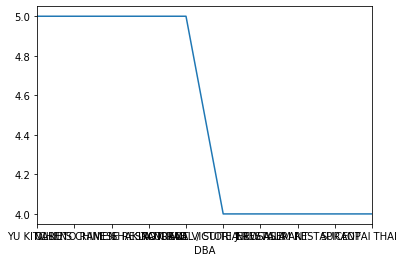

In [41]:
df_2018.groupby(['DBA','INSPECTION DATE']).\
ACTION.count().\
reset_index(name="Time").groupby('DBA').Time.mean().\
sort_values(ascending=False).head(10).\
plot()#(kind='scatter')

In [93]:
#VIOLATIONS FOR 2018
df_2018 = df[df['INSPECTION DATE'].str.endswith('18')]
df_2018.head()


,DBA,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,CRITICAL FLAG,GRADE,INSPECTION TYPE,category
2,P & S DELI GROCERY,730,COLUMBUS AVENUE,10025.0,American,12/18/18,Violations were cited in the following area(s).,Cold food item held above 41Âº F (smoked fish ...,Critical,A,Cycle Inspection / Re-inspection,NaN
3,P & S DELI GROCERY,730,COLUMBUS AVENUE,10025.0,American,12/18/18,Violations were cited in the following area(s).,Food not protected from potential source of co...,Critical,A,Cycle Inspection / Re-inspection,NaN
4,P & S DELI GROCERY,730,COLUMBUS AVENUE,10025.0,American,7/2/18,Violations were cited in the following area(s).,Live roaches present in facility's food and/or...,Critical,C,Cycle Inspection / Re-inspection,Bugs
5,P & S DELI GROCERY,730,COLUMBUS AVENUE,10025.0,American,7/2/18,Violations were cited in the following area(s).,Facility not vermin proof. Harborage or condit...,Not Critical,C,Cycle Inspection / Re-inspection,NaN
6,P & S DELI GROCERY,730,COLUMBUS AVENUE,10025.0,American,7/2/18,Violations were cited in the following area(s).,Pesticide use not in accordance with label or ...,Not Critical,C,Cycle Inspection / Re-inspection,NaN


In [ ]:
import matplotlib.pyplot as plt


In [42]:
#HOW MANY VIOLATIONS ONE RESTAURANT HAS (FOR 2018)
df_2018.groupby(['DBA','BUILDING', 'STREET']).count()['VIOLATION DESCRIPTION'].reset_index().sort_values(by='VIOLATION DESCRIPTION',ascending=False).head(10)

,DBA,BUILDING,STREET,VIOLATION DESCRIPTION
113,NEW RANCHITO,924,AMSTERDAM AVENUE,11
145,SPOONBREAD TOO,364,WEST 110 STREET,10
110,NARUTO RAMEN,2634,BROADWAY,10
116,OLLIE'S CHINESE RESTAURANT,2705,BROADWAY,10
135,ROTI ROLL / SUITE,992,AMSTERDAM AVENUE,10
56,FREDA'S,993,COLUMBUS AVENUE,8
30,CHIRPING CHICKEN,940,COLUMBUS AVE,8
139,SERAFINA 105,2735-2737,BROADWAY,8
144,SPICE,975,AMSTERDAM AVE,8
0,1020 BAR,1020,AMSTERDAM AVENUE,7


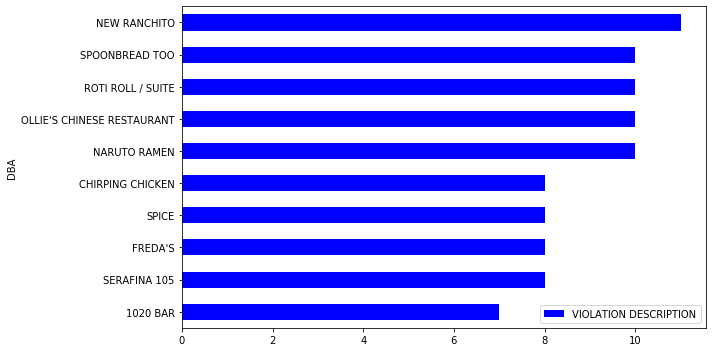

In [61]:
fig, ax = plt.subplots(figsize=(10, 5))
df_2018.groupby(['DBA','BUILDING', 'STREET']).count()['VIOLATION DESCRIPTION']. \
reset_index(). \
sort_values(by='VIOLATION DESCRIPTION',ascending=True).tail(10). \
plot(x='DBA', y='VIOLATION DESCRIPTION', kind='barh', color='blue', ax=ax)
plt.tight_layout()
plt.savefig('restaurants_most_violations.pdf')

In [55]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt

%matplotlib inline

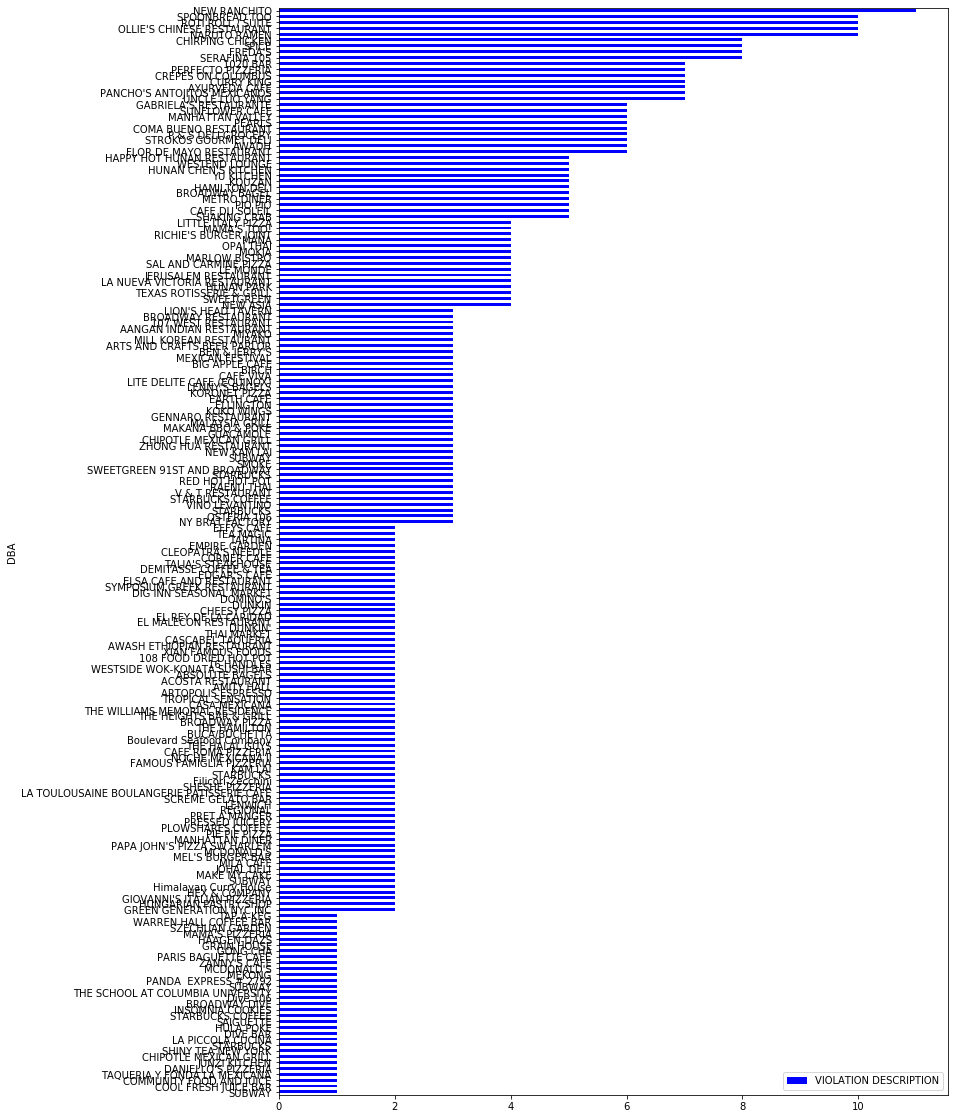

In [56]:
fig, ax = plt.subplots(figsize=(12, 20))
df_2018.groupby(['DBA','BUILDING', 'STREET']).count()['VIOLATION DESCRIPTION'].reset_index().sort_values(by='VIOLATION DESCRIPTION',ascending=True).plot(x='DBA', y='VIOLATION DESCRIPTION', kind='barh', color='blue', ax=ax)


In [46]:
#IN ONE INSPECTION, HOW MANY VIOLATIONS THE GOT

!pip install seaborn
import seaborn as sns


In [59]:
plt.scatter(by=['DBA','VIOLATION DESCRIPTION'])
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [94]:
df_2018['VIOLATION DESCRIPTION'].value_counts().index

Index(['Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.',
       'Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.',
       'Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly.',
       'Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.',
       'Filth flies or food/refuse/sewage-associated (FRSA) flies present in facilitys food and/or non-food areas. Filth flies include house flies, little house flies, blow flies, bottle flies and f

In [95]:
df_summarized = df_2018['VIOLATION DESCRIPTION'].replace(
    dict(zip(df_2018['VIOLATION DESCRIPTION'].value_counts().index[0:32],
             ['Unacceptable material used',
       'Facility not vermin proof', 'Plumbing not properly installed/maintained','Cold food held above the appropriate temperature','filth flies present','mice present','Hot food not held at appropriate temperature','Improper food handling','Food improperly protected from potential contamination','Roaches present','Wiping cloths not storezed in sanitizing solution','Food contact surface improperly maintained','Raw/cooked/prepared food contaminated','Improper thawing procedure','Food Protection Certificate not held by supervisor','Proper sanitization not provided for utensil washing','Personal cleanliness inadequate','Sanitized equipment or utensil improperly used or stored','Tobacco use in food preparation areas','Food not cooled by an approved method','Single service item reused','Bare contact with food','Pesticide use not in accordance with label','Mechanical or natural ventilation system not provided','Wash hands sign not posted at hand wash facility','Hand washing facility not provided','Rats present','Dented canned foods','Toilet facility not maintained','Covered garbage receptacle not provided','Food worker does not wash hands thoroughly','Thermometer not provided in refrigerated/hot holding equipment']))).value_counts()

In [96]:
df_summarized

Unacceptable material used                                                     120
Facility not vermin proof                                                       63
Plumbing not properly installed/maintained                                      48
Cold food held above the appropriate temperature                                39
mice present                                                                    31
filth flies present                                                             31
Hot food not held at appropriate temperature                                    30
Improper food handling                                                          30
Food improperly protected from potential contamination                          23
Wiping cloths not storezed in sanitizing solution                               19
Roaches present                                                                 19
Food contact surface improperly maintained                                      15
Raw/

In [63]:
dict(zip(df_2018['VIOLATION DESCRIPTION'].value_counts().index[0:2],['Unacceptable material used',
       'Facility not vermin proof.']))

{'Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.': 'Unacceptable material used',
 'Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.': 'Facility not vermin proof.'}

In [64]:
#use.replace
df_2018['VIOLATION DESCRIPTION'].value_counts()

Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                      120
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.                                                                                                                                                                    63
Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly.                                                                    48
Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during n

In [52]:
has_roaches = df['VIOLATION DESCRIPTION'].str.contains("roach", na=False)
df.loc[has_roaches, 'category'] = 'Bugs'

has_flies = df['VIOLATION DESCRIPTION'].str.contains(" flies", na=False)
df.loc[has_flies, 'category'] = 'Flies'

has_mice = df['VIOLATION DESCRIPTION'].str.contains("mice", na=False)
df.loc[has_mice, 'category'] = 'Mice'

has_rats = df['VIOLATION DESCRIPTION'].str.contains("rats", na=False)
df.loc[has_rats, 'category'] = 'Rats'

has_contamination = df['VIOLATION DESCRIPTION'].str.contains("contamination", na=False)
df.loc[has_rats, 'category'] = 'Rats'

#Raw, cooked or prepared food is adulterated, contaminated, cross-contaminated, or not discarded in accordance with HACCP plan.                                                                                                                                                                                                                                               30


In [53]:
df.category.value_counts()

Mice     91
Flies    87
Bugs     37
Rats      8
Name: category, dtype: int64

In [133]:
df_2018['VIOLATION DESCRIPTION'].value_counts()

Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                      120
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.                                                                                                                                                                    63
Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly.                                                                    48
Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during n

In [143]:
df_summarized = df_2018['VIOLATION DESCRIPTION'].replace(
    dict(zip(df_2018['VIOLATION DESCRIPTION'].value_counts().index[0:31],
             ['Unacceptable material used',
       'Facility not vermin proof', 'Plumbing not properly installed/maintained','Cold food held above the appropriate temperature','filth flies present','mice present','Hot food not held at appropriate temperature','Improper food handling','Food improperly protected from potential contamination','Roaches present','Wiping cloths not storezed in sanitizing solution','Food contact surface improperly maintained','Raw/cooked/prepared food contaminated','Improper thawing procedure','Food Protection Certificate not held by supervisor','Proper sanitization not provided for utensil washing','Personal cleanliness inadequate','Sanitized equipment or utensil improperly used or stored','Tobacco use in food preparation areas','Food not cooled by an approved method','Single service item reused','Bare contact with food','Pesticide use not in accordance with label','Mechanical or natural ventilation system not provided','Wash hands sign not posted at hand wash facility','Hand washing facility not provided','Rats present','Dented canned foods','Toilet facility not maintained','Covered garbage receptacle not provided','Food worker does not wash hands thoroughly','Thermometer not provided']))).value_counts()

In [144]:
df_summarized

Unacceptable material used                                                                                                                                                                                            120
Facility not vermin proof                                                                                                                                                                                              63
Plumbing not properly installed/maintained                                                                                                                                                                             48
Cold food held above the appropriate temperature                                                                                                                                                                       39
mice present                                                                                                                    

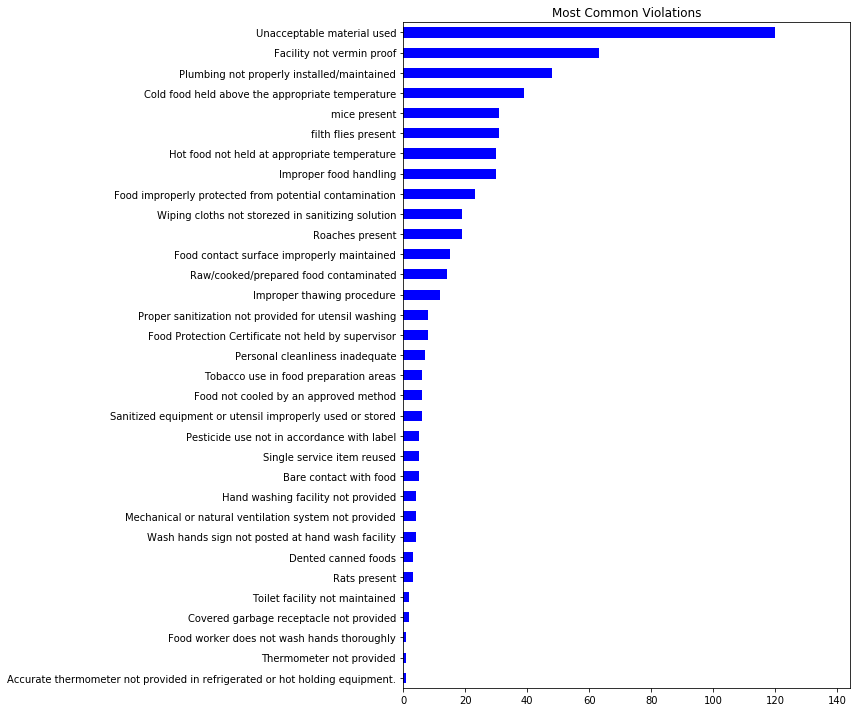

In [132]:
plt.figure(figsize=(12, 10))
df_summarized.sort_values().plot(kind='barh', color='blue', title='Most Common Violations')
plt.xticks(rotation='horizontal')
plt.margins(0.2)
plt.tight_layout()
plt.savefig('restaurants_most_violations.pdf')

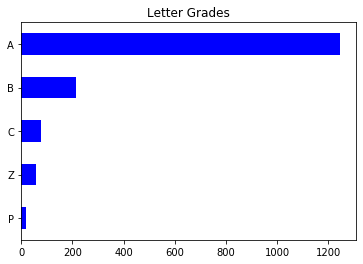

In [62]:
#plt.figure(figsize=(9, 7))
df.GRADE.value_counts().sort_values().plot(kind='barh', color='blue', title='Letter Grades')
#plt.xticks(rotation='horizontal')
#plt.margins(0.2)

In [21]:
df['GRADE'].value_counts()

A    1245
B     213
C      78
Z      58
P      18
Name: GRADE, dtype: int64